In [3]:
from fastai.imports import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
import IPython
from pandas.api.types import is_string_dtype, is_numeric_dtype

from sklearn import metrics
from pathlib2 import Path
import feather
from sklearn.tree import export_graphviz
import re
import graphviz

In [6]:
path = Path('/kaggle/input/house-prices-advanced-regression-techniques')
list(path.iterdir())

[PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/train.csv'),
 PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv'),
 PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/test.csv'),
 PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')]

In [35]:
df_raw = pd.read_csv(f'{path}/train.csv')

In [36]:
def display_all(df):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(df)

In [37]:
print(df_raw.shape)
display_all(df_raw.tail().T)

(1460, 81)


,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [38]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [40]:
def parallel_trees(m, fn, n_jobs=8):
    return list(ProcessPoolExecutor(n_jobs).map(fn, m.estimators_))

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    s = export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                        special_characters=True, rotate=True, precision=precision)
    Ipython.display.display(re.sub(graphviz.Source('Tree {', f'Tree {{ size = {size}; ratio={ratio}', s)))
    
def rf_feature_imp(m, df):
    return pd.DataFrame({'cols': df.columns, 'importance': m.feature_importances_}).sort_values('importance', ascending=False)

def add_datepart(df, fldname, drop=True, time=False):
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64
        
    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time:
        attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr:
        df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop:
        df.drop(fldname, axis=1, inplace=True)
    
def train_cats(df):
    for n, c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype('category').cat.as_ordered()

        
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = col.cat.codes+1
        
        
def get_sample(df, n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()


def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

def proc_df(df, y_fld, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not skip_flds:
        skip_flds = []
    if not ignore_flds:
        ignore_flds = []
    if subset:
        df = get_sample(df, subset)
    else:
        df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn:
        preproc_fn(df)
    if y_fld is None:
        y = None
    else:
        if not is_numeric_dtype(df[y_fld]):
            df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)
    
    if na_dict is None:
        na_dict = {}
    else:
        na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n, c in df.items():
        na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale:
        mapper = scale_vars(df, mapper)
    for n, c in df.items():
        numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale:
        res = res + mapper
    return res

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {', f'Tree {{ size = {size}; ratio={ratio}', s)))
    
def parallel_trees(m, fn, n_jobs=8):
    return list(ProcessPoolExecutor(n_jobs).map(fn, m.estimators_))

def rf_feature_imp(m, df):
    return pd.DataFrame({'cols': df.columns, 'importance': m.feature_importances_}).sort_values('importance', ascending=False)

In [41]:
df_raw['SaleYear'] =  df_raw['YrSold'].map(str) + '-' + df_raw['MoSold'].map(str) + '-01' 

In [42]:
 display_all(df_raw.sample(5).T)

,878,1312,1186,317,654
Id,879,1313,1187,318,655
MSSubClass,85,60,190,60,20
MSZoning,RL,RL,RL,FV,RL
LotFrontage,88,NaN,107,75,91
LotArea,11782,9572,10615,9000,10437
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,IR1,IR1,IR1,Reg,IR1
LandContour,Lvl,Lvl,Bnk,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [43]:
add_datepart(df_raw, 'SaleYear')

In [44]:
display_all(df_raw.head().T)

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [45]:
train_cats(df_raw)

In [46]:
df_raw.Neighborhood.cat.categories

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

In [47]:
display_all(df_raw.isnull().sum().sort_index() / len(df_raw))

1stFlrSF                    0.000000
2ndFlrSF                    0.000000
3SsnPorch                   0.000000
Alley                       0.937671
BedroomAbvGr                0.000000
BldgType                    0.000000
BsmtCond                    0.025342
BsmtExposure                0.026027
BsmtFinSF1                  0.000000
BsmtFinSF2                  0.000000
BsmtFinType1                0.025342
BsmtFinType2                0.026027
BsmtFullBath                0.000000
BsmtHalfBath                0.000000
BsmtQual                    0.025342
BsmtUnfSF                   0.000000
CentralAir                  0.000000
Condition1                  0.000000
Condition2                  0.000000
Electrical                  0.000685
EnclosedPorch               0.000000
ExterCond                   0.000000
ExterQual                   0.000000
Exterior1st                 0.000000
Exterior2nd                 0.000000
Fence                       0.807534
FireplaceQu                 0.472603
F

In [48]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [49]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [50]:
rmse = lambda x, y: math.sqrt(((x - y) ** 2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train),
           m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'):
        res.append(m.oob_score_)
    print(res)

In [51]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9725539664308592

In [52]:
def split_vals(a, n):
    return a[:n].copy(), a[n:].copy()

In [53]:
n_valid = 300
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1160, 96), (1160,), (300, 96), (300,))

In [54]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=10)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 340 ms, sys: 8 ms, total: 348 ms
Wall time: 221 ms
[0.06702239388411549, 0.15902732532424652, 0.9722048927752415, 0.8325038507565712]


In [55]:
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleYearDay,SaleYearDayofweek,SaleYearDayofyear,SaleYearIs_month_end,SaleYearIs_month_start,SaleYearIs_quarter_end,SaleYearIs_quarter_start,SaleYearIs_year_end,SaleYearIs_year_start,SaleYearElapsed
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1,4,32,False,True,False,False,False,False,1201824000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1,1,121,False,True,False,False,False,False,1177977600
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1,0,245,False,True,False,False,False,False,1220227200
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1,2,32,False,True,False,False,False,False,1138752000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,0,336,False,True,False,False,False,False,1228089600


In [56]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 115 ms
[0.21157311293857983, 0.23773111225367893, 0.7230193473668171, 0.625688334420659]


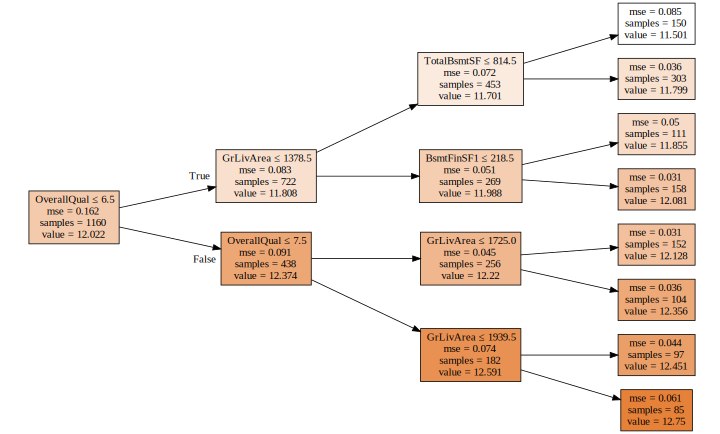

In [58]:
draw_tree(m.estimators_[0], df, precision=3)